In [14]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [15]:
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error

eda_dpp_utils = importlib.import_module('eda_dpp_utils')
rmu = importlib.import_module('regression_model_utils')
feu = importlib.import_module('feature_eng_utils')
aed = importlib.import_module('anomaly_and_event_detection_utils')

importlib.reload(eda_dpp_utils)
importlib.reload(rmu)
importlib.reload(feu)
importlib.reload(aed)

<module 'anomaly_and_event_detection_utils' from '/Users/jey/Downloads/forecasting_air_pollution-main/anomaly_and_event_detection_utils.py'>

In [16]:
df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()

windows = [3, 6, 12, 24]
lags = [1, 3, 6, 12, 24]
targets = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,weekday,month
timestamp,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,0.339838,1.222636,-0.336554,0.248799,0.408497,-0.418230,0.875915,-0.002078,0.694632,0.627461,-0.544932,-0.019688,-0.676368,18,2,3
2004-03-10 19:00:00,-0.116065,0.903075,-0.522410,-0.093542,0.060585,-0.743934,1.344646,-0.480209,0.302726,-0.130324,-0.579584,-0.090381,-0.757967,19,2,3
2004-03-10 20:00:00,0.035903,1.420012,-0.639792,-0.148317,-0.000586,-0.599177,1.209588,0.020691,0.290939,0.130805,-0.741291,0.280757,-0.695568,20,2,3
2004-03-10 21:00:00,0.035903,1.297827,-0.678919,-0.120929,0.033823,-0.387210,1.018918,0.202836,0.376392,0.461055,-0.845245,0.634222,-0.603358,21,2,3
2004-03-10 22:00:00,-0.420001,0.809086,-0.820757,-0.490658,-0.394377,-0.599177,1.467787,0.066227,0.099407,0.222968,-0.822144,0.610658,-0.598052,22,2,3


In [17]:
df = feu.addMovingAverages(df_unnormalised, windows, targets)
df = feu.addLagFeatures(df, lags, targets)

df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,NOx(GT)_lag1,NOx(GT)_lag3,NOx(GT)_lag6,NOx(GT)_lag12,NOx(GT)_lag24,NO2(GT)_lag1,NO2(GT)_lag3,NO2(GT)_lag6,NO2(GT)_lag12,NO2(GT)_lag24
timestamp,,,,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,...,166.0,NaN,NaN,NaN,NaN,113.0,NaN,NaN,NaN,NaN
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,103.0,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,131.0,166.0,NaN,NaN,NaN,114.0,113.0,NaN,NaN,NaN
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,172.0,103.0,NaN,NaN,NaN,122.0,92.0,NaN,NaN,NaN


In [18]:
def split_train_test(df, target):
    """
    Train/Test split rule:
    - For all targets except NMHC(GT): Year 2004 train, 2005 test
    - For NMHC(GT):
        → drop NA rows
        → 80/20 split
    """
    df = df.copy()

    if target != "NMHC(GT)":
        train_df = df[df.index.year == 2004].copy()
        test_df  = df[df.index.year == 2005].copy()
    else:
        df_clean = df.dropna(subset=['NMHC(GT)'])
        split_idx = int(0.8 * len(df_clean))
        train_df = df_clean.iloc[:split_idx].copy()
        test_df  = df_clean.iloc[split_idx:].copy()
    
    return train_df, test_df


for t in targets:
    tr, te = split_train_test(df, t)
    print(t, tr.shape, te.shape)

CO(GT) (7110, 61) (2247, 61)
NMHC(GT) (731, 61) (183, 61)
C6H6(GT) (7110, 61) (2247, 61)
NOx(GT) (7110, 61) (2247, 61)
NO2(GT) (7110, 61) (2247, 61)


In [19]:
def mean_baseline(train_df, test_df, target):
    y_train = train_df[target]
    y_test  = test_df[target]

    mean_val = y_train.mean()
    y_pred   = np.repeat(mean_val, len(y_test))

    rmse = root_mean_squared_error(y_test, y_pred)
    return mean_val, rmse

In [20]:
def naive_persistence_baseline(test_df, target, horizon=1):
    y_test = test_df[target]
    
    y_naive = y_test.shift(horizon)

    y_test_aligned  = y_test.dropna()
    y_naive_aligned = y_naive.dropna()

    common_idx = y_test_aligned.index.intersection(y_naive_aligned.index)
    y_test_aligned  = y_test_aligned.loc[common_idx]
    y_naive_aligned = y_naive_aligned.loc[common_idx]

    rmse = root_mean_squared_error(y_test_aligned, y_naive_aligned)
    return rmse

In [21]:
results = []

for target in targets:
    train_df, test_df = split_train_test(df, target)

    mean_val, rmse_mean = mean_baseline(train_df, test_df, target)
    rmse_naive = naive_persistence_baseline(test_df, target)

    results.append({
        "Target": target,
        "Mean_RMSE": rmse_mean,
        "Naive_RMSE": rmse_naive
    })

baseline_df = pd.DataFrame(results)
baseline_df

,Target,Mean_RMSE,Naive_RMSE
0,CO(GT),1.339714,0.824327
1,NMHC(GT),231.377813,156.763926
2,C6H6(GT),6.765095,3.613584
3,NOx(GT),227.116982,114.046940
4,NO2(GT),62.676188,27.176093


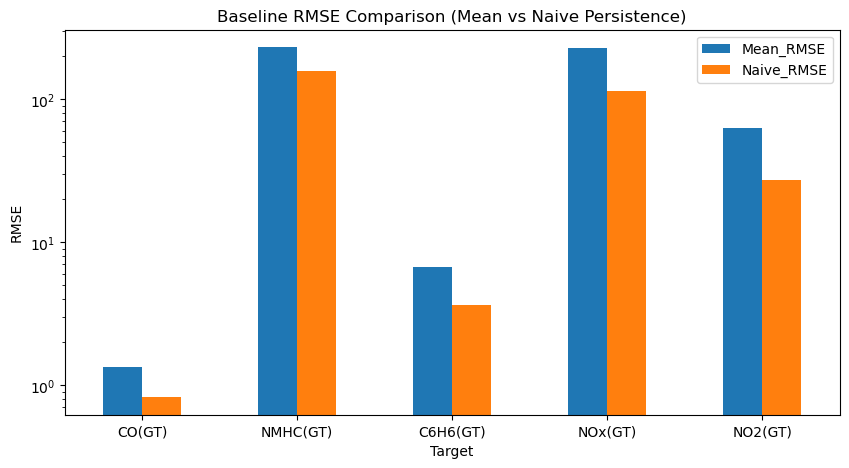

In [22]:
baseline_df.plot(
    x="Target",
    kind="bar",
    figsize=(10,5),
    title="Baseline RMSE Comparison (Mean vs Naive Persistence)"
)
plt.ylabel("RMSE")
plt.xticks(rotation=0)

plt.yscale('log')

plt.show()

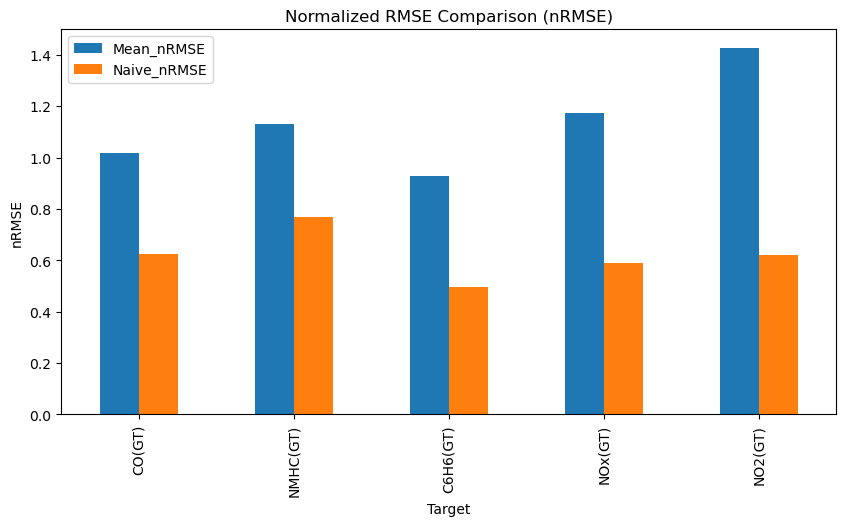

In [13]:
stds = df_unnormalised[targets].std()
baseline_df["Mean_nRMSE"] = baseline_df["Mean_RMSE"] / stds.values
baseline_df["Naive_nRMSE"] = baseline_df["Naive_RMSE"] / stds.values

baseline_df.plot(
    x="Target",
    y=["Mean_nRMSE", "Naive_nRMSE"],
    kind="bar",
    figsize=(10,5),
    title="Normalized RMSE Comparison (nRMSE)"
)
plt.ylabel("nRMSE")
plt.show()

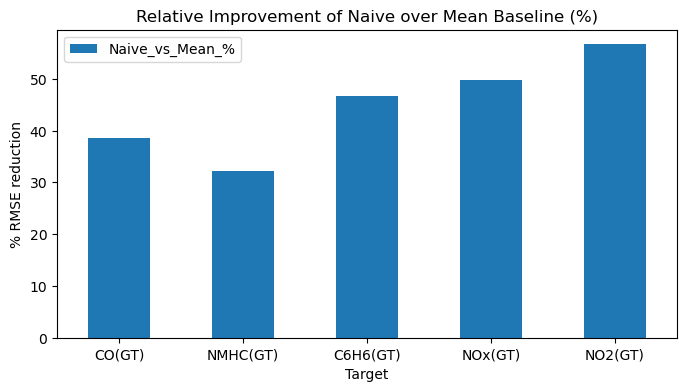

In [23]:
baseline_df["Naive_vs_Mean_%"] = (
    (baseline_df["Mean_RMSE"] - baseline_df["Naive_RMSE"])
    / baseline_df["Mean_RMSE"] * 100
)

baseline_df.plot(
    x="Target",
    y="Naive_vs_Mean_%",
    kind="bar",
    figsize=(8,4),
    title="Relative Improvement of Naive over Mean Baseline (%)"
)
plt.ylabel("% RMSE reduction")
plt.xticks(rotation=0)
plt.show()

In [28]:
def naive_persistence_baseline(test_df, target, horizon=1):
    """
    Naive persistence baseline:
    y_pred(t) = y(t - horizon)
    horizon: 예측하고 싶은 시간 간격 (1, 6, 12, 24 등)
    """
    y_test = test_df[target]

    y_naive = y_test.shift(horizon)

    y_test_aligned  = y_test.dropna()
    y_naive_aligned = y_naive.dropna()

    common_idx = y_test_aligned.index.intersection(y_naive_aligned.index)
    y_test_aligned  = y_test_aligned.loc[common_idx]
    y_naive_aligned = y_naive_aligned.loc[common_idx]

    rmse = root_mean_squared_error(y_test_aligned, y_naive_aligned)
    return rmse

In [29]:
horizons = [1, 6, 12, 24]

multi_rows = []

for target in targets:
    train_df, test_df = split_train_test(df, target)

    mean_val, rmse_mean = mean_baseline(train_df, test_df, target)

    for h in horizons:
        rmse_naive = naive_persistence_baseline(test_df, target, horizon=h)

        multi_rows.append({
            "Target": target,
            "Horizon": h,
            "Mean_RMSE": rmse_mean,
            "Naive_RMSE": rmse_naive,
        })

baseline_multi = pd.DataFrame(multi_rows)
baseline_multi

,Target,Horizon,Mean_RMSE,Naive_RMSE
0,CO(GT),1,1.339714,0.824327
1,CO(GT),6,1.339714,1.767662
2,CO(GT),12,1.339714,1.765208
3,CO(GT),24,1.339714,1.278930
4,NMHC(GT),1,231.377813,156.763926
5,NMHC(GT),6,231.377813,294.312413
6,NMHC(GT),12,231.377813,281.789468
7,NMHC(GT),24,231.377813,201.651312
8,C6H6(GT),1,6.765095,3.613584
9,C6H6(GT),6,6.765095,8.123835


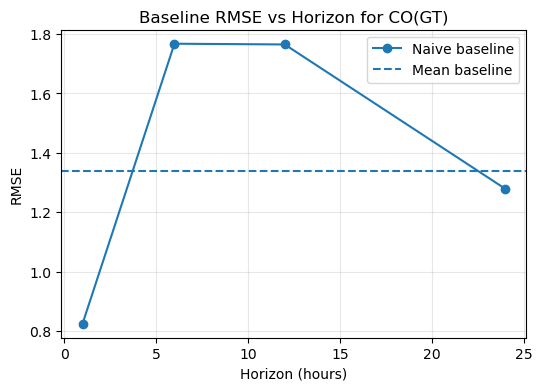

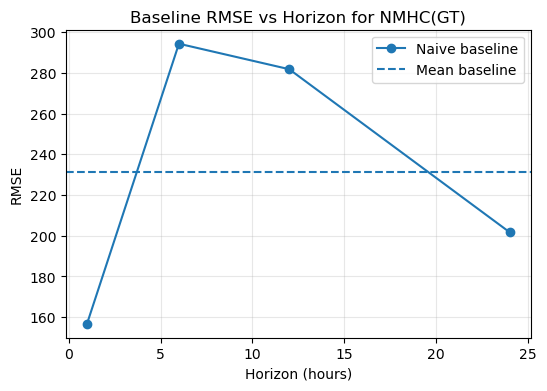

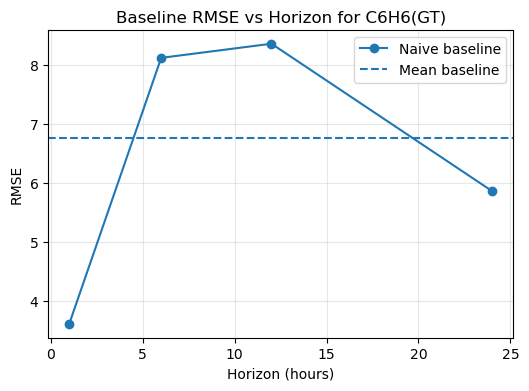

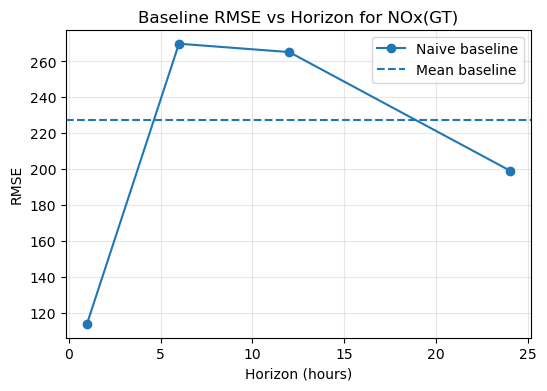

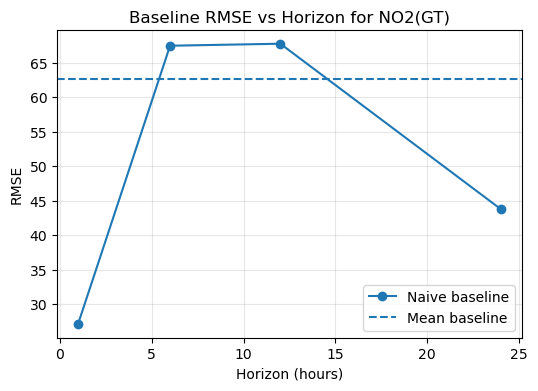

In [30]:
for target in targets:
    sub = baseline_multi[baseline_multi["Target"] == target]

    plt.figure(figsize=(6,4))
    plt.plot(sub["Horizon"], sub["Naive_RMSE"], marker='o', label="Naive baseline")
    plt.axhline(sub["Mean_RMSE"].iloc[0], linestyle='--', label="Mean baseline")

    plt.title(f"Baseline RMSE vs Horizon for {target}")
    plt.xlabel("Horizon (hours)")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [31]:
baseline_multi["Naive_vs_Mean_%"] = (
    (baseline_multi["Mean_RMSE"] - baseline_multi["Naive_RMSE"])
    / baseline_multi["Mean_RMSE"] * 100
)

baseline_multi

,Target,Horizon,Mean_RMSE,Naive_RMSE,Naive_vs_Mean_%
0,CO(GT),1,1.339714,0.824327,38.469935
1,CO(GT),6,1.339714,1.767662,-31.943237
2,CO(GT),12,1.339714,1.765208,-31.760043
3,CO(GT),24,1.339714,1.278930,4.537122
4,NMHC(GT),1,231.377813,156.763926,32.247641
5,NMHC(GT),6,231.377813,294.312413,-27.199929
6,NMHC(GT),12,231.377813,281.789468,-21.787592
7,NMHC(GT),24,231.377813,201.651312,12.847602
8,C6H6(GT),1,6.765095,3.613584,46.584864
9,C6H6(GT),6,6.765095,8.123835,-20.084567


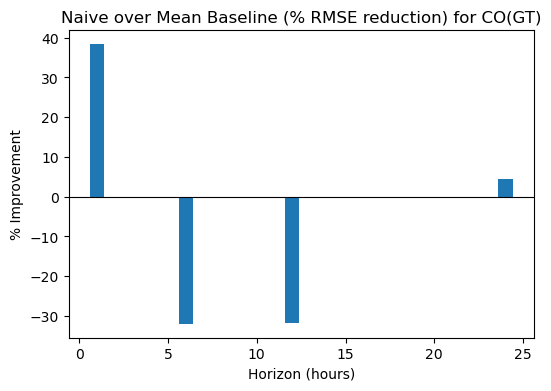

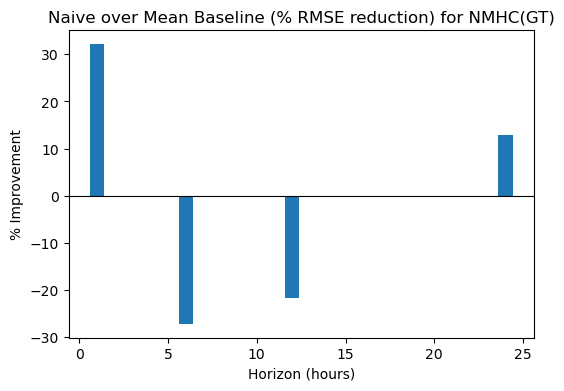

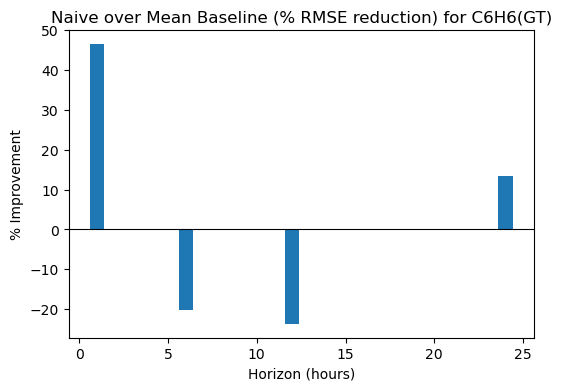

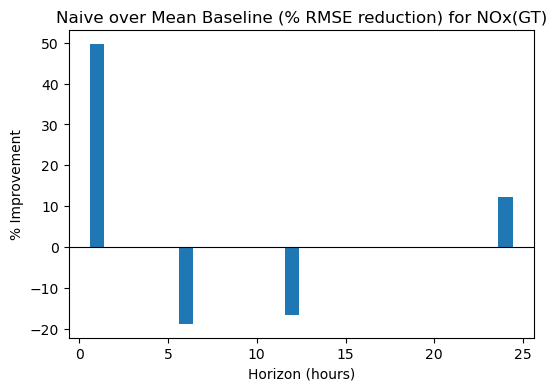

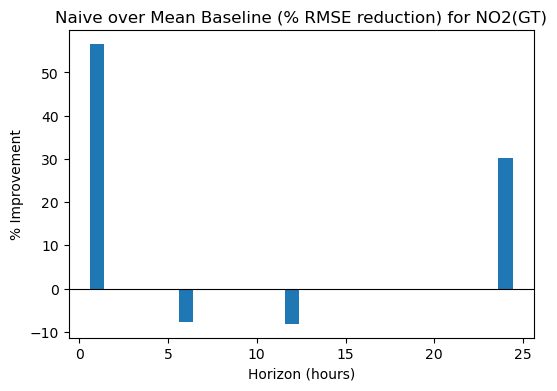

In [32]:
for target in targets:
    sub = baseline_multi[baseline_multi["Target"] == target]

    plt.figure(figsize=(6,4))
    plt.bar(sub["Horizon"], sub["Naive_vs_Mean_%"])
    plt.title(f"Naive over Mean Baseline (% RMSE reduction) for {target}")
    plt.xlabel("Horizon (hours)")
    plt.ylabel("% Improvement")
    plt.axhline(0, color='black', linewidth=0.8)
    plt.show()